# Simple network

This is a simple network to solve a simple problem, illustrating the process of training, hyperparameter choice and more.

## Imports

In [2]:
# Libraries needed to import for this example

import numpy as np                    # Basic numerical python library
import matplotlib.pyplot as plt       # Plotting library for python

import tensorflow as tf               # Google library for Deep Learning
import keras as kr                    # High-level API for Tensorflow

2024-09-24 11:24:17.846057: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Target function

We will use the following function: sin(x$^2$-y$^2$)

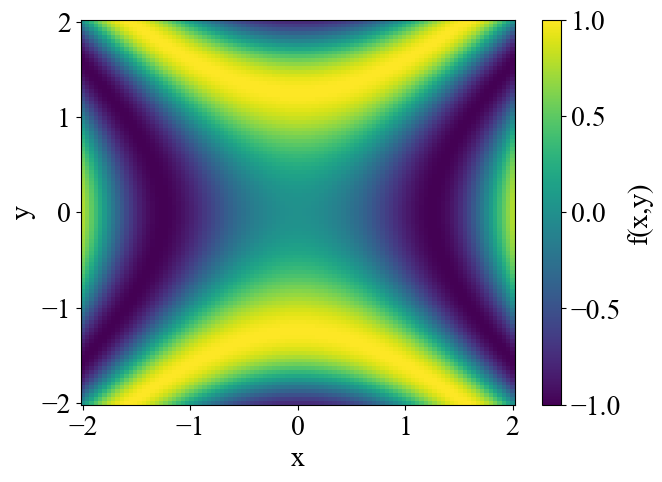

In [11]:
# Step 1: make a 2D mesh to plot it

N_points_plot = 100 # Number of points for each side in the mesh

x_mesh_plot = np.linspace(-2,2,N_points_plot)
y_mesh_plot = np.linspace(-2,2,N_points_plot)

plot_mesh = np.zeros((N_points_plot,N_points_plot))

# Step 2: obtain the function

for i in range(N_points_plot):
    
    for j in range(N_points_plot):
        
        plot_mesh[i,j] = np.sin(x_mesh_plot[i]**2-y_mesh_plot[j]**2)

# Step 3: plot the function

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
pcm = axs.pcolormesh(x_mesh_plot,y_mesh_plot,plot_mesh,clim=(-1,1))
axs.set_ylabel('y', fontsize = 20)
axs.set_xlabel('x', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
cbar = fig.colorbar(pcm)
cbar.ax.set_ylabel('f(x,y)', fontsize = 20)
cbar.ax.tick_params(labelsize = 20)
fig.savefig('DL_simple_2Dfunct.png', format='png', dpi=600)
plt.show()

## Train a network

Epoch 1/100


/tmp/ipykernel_8364/3999780661.py:23: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]


250/250 [==============================] - 1s 2ms/step - loss: 0.4358 - val_loss: 0.4402
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4357 - val_loss: 0.4404
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4342 - val_loss: 0.4486
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4349 - val_loss: 0.4388
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4341 - val_loss: 0.4362
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4306 - val_loss: 0.4316
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4202 - val_loss: 0.4270
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3976 - val_loss: 0.3902
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3455 - val_loss: 0.3245
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.2812 - val_loss: 0.2629
E

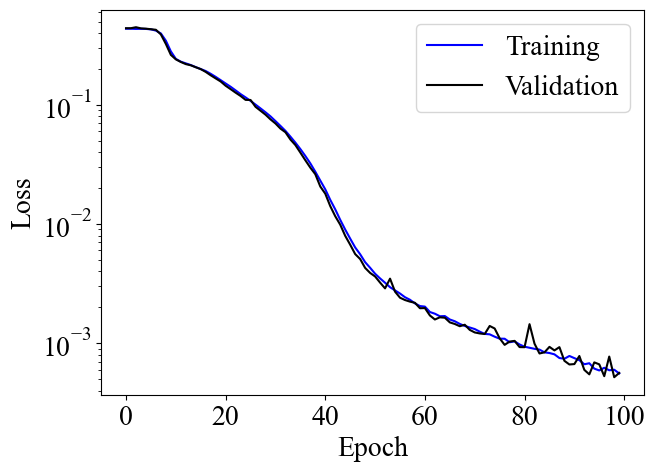

In [12]:
# We will make a network that maps 2 inputs (x,y) to 1 output (sin(x^2-y^2))

np.random.seed(42) # Fix the random seed for numpy
kr.utils.set_random_seed(42) # Fix the random seed for Keras

# Step 1: obtain datasets

N_points_data = 100

x_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))
y_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))

input_data = np.zeros((N_points_data**2,2))
output_data = np.zeros((N_points_data**2,1))

input_data_rand = np.zeros((N_points_data**2,2))
output_data_rand = np.zeros((N_points_data**2,1))

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]
        output_data[i*N_points_data+j] = np.sin(x_mesh_data[i]**2-y_mesh_data[j]**2)
        
random_index = np.linspace(0,N_points_data**2-1,N_points_data**2)
np.random.shuffle(random_index)

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        index_rand = int(random_index[i*N_points_data+j])
        
        input_data_rand[i*N_points_data+j] = input_data[index_rand]
        output_data_rand[i*N_points_data+j] = output_data[index_rand]

# Step 2: create the network

input_label = kr.Input((2,))
netl = kr.layers.Dense(50, activation = 'sigmoid')(input_label)
netl = kr.layers.Dense(50, activation = 'sigmoid')(netl)
netl = kr.layers.Dense(1)(netl) # Connected the layers one after the other

net = kr.Model(input_label,netl) # Create the full network

opt = tf.keras.optimizers.Adam(learning_rate=0.001) # Choose optimizer

net.compile(loss='mean_squared_error', optimizer=opt) # Compile the network

# Step 3: train the network

batch_size = 32
n_epochs = 100
val_percentage = 0.2

net2 = net.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs)
loss = net2.history['loss'] #recording of loss
val_loss = net2.history['val_loss'] #recording of val_loss

# Step 4: plot the result

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
axs.plot(loss,color='blue')
axs.plot(val_loss,color='black')
axs.set_ylabel('Loss', fontsize = 20)
axs.set_yscale('log')
axs.set_xlabel('Epoch', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
axs.legend(['Training', 'Validation'], loc='upper right', fontsize = 20)
#axs.vlines([10,30,50],0.6,0.0005,'k','dashed')
#fig.savefig('DL_simple_steps.png', format='png', dpi=600)
plt.show()

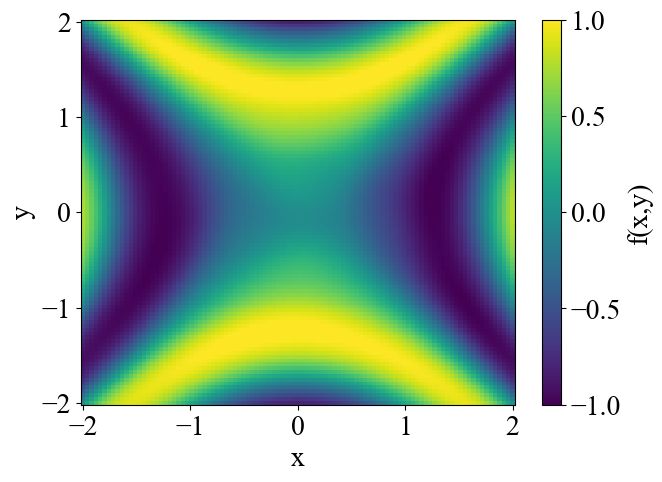

In [13]:
# Check the reproduction of the network

N_points_net = 100

x_mesh_net = np.linspace(-2,2,N_points_net)
y_mesh_net = np.linspace(-2,2,N_points_net)

net_result = np.zeros((N_points_net,N_points_net))

for i in range(N_points_net):
    
    for j in range(N_points_net):
        
        input_try = np.reshape(np.array([x_mesh_net[i],y_mesh_net[j]]),(1,2))
        net_result[i,j] = np.reshape(net(input_try),(1,))

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
pcm = axs.pcolormesh(x_mesh_net,y_mesh_net,net_result,clim=(-1,1))
axs.set_ylabel('y', fontsize = 20)
axs.set_xlabel('x', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
cbar = fig.colorbar(pcm)
cbar.ax.set_ylabel('f(x,y)', fontsize = 20)
cbar.ax.tick_params(labelsize = 20)
fig.savefig('DL_simple_repro.png', format='png', dpi=600)
plt.show()

In [11]:
# Ask the network to predict any single point

input_try2 = np.reshape(np.array([0,-3]),(1,2))
net_result2 = np.reshape(net(input_try2),(1,))

print(net_result2)

[1.4237]


/tmp/ipykernel_8364/3746200992.py:23: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]


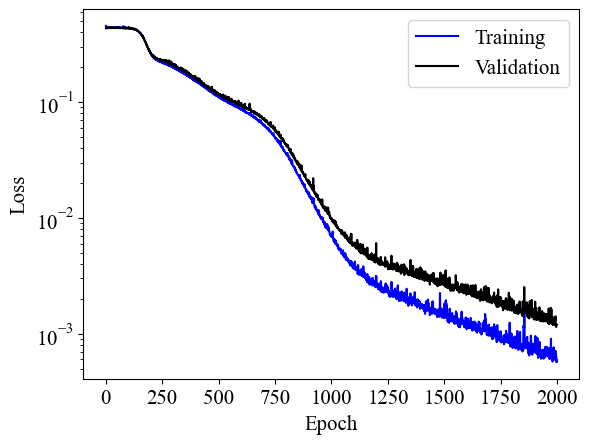

In [22]:
# We will make a network that maps 2 inputs (x,y) to 1 output (sin(x^2-y^2)), reducing the training set

np.random.seed(42) # Fix the random seed for numpy
kr.utils.set_random_seed(42) # Fix the random seed for Keras

# Step 1: obtain datasets

N_points_data = 100

x_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))
y_mesh_data = np.reshape(np.linspace(-2,2,N_points_data),(N_points_data,1))

input_data = np.zeros((N_points_data**2,2))
output_data = np.zeros((N_points_data**2,1))

input_data_rand = np.zeros((N_points_data**2,2))
output_data_rand = np.zeros((N_points_data**2,1))

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        input_data[i*N_points_data+j] = x_mesh_data[i],y_mesh_data[j]
        output_data[i*N_points_data+j] = np.sin(x_mesh_data[i]**2-y_mesh_data[j]**2)
        
random_index = np.linspace(0,N_points_data**2-1,N_points_data**2)
np.random.shuffle(random_index)

for i in range(N_points_data):
    
    for j in range(N_points_data):
        
        index_rand = int(random_index[i*N_points_data+j])
        
        input_data_rand[i*N_points_data+j] = input_data[index_rand]
        output_data_rand[i*N_points_data+j] = output_data[index_rand]

# Step 2: create the network

input_label = kr.Input((2,))
netl = kr.layers.Dense(50, activation = 'sigmoid')(input_label)
netl = kr.layers.Dense(50, activation = 'sigmoid')(netl)
netl = kr.layers.Dense(1)(netl) # Connected the layers one after the other

net = kr.Model(input_label,netl) # Create the full network

opt = tf.keras.optimizers.Adam(learning_rate=0.001) # Choose optimizer

net.compile(loss='mean_squared_error', optimizer=opt) # Compile the network

# Step 3: train the network

batch_size = 32
n_epochs = 2000#int(80*100*100/32)#100
val_percentage = 0.96#0.9968#0.2

net2 = net.fit(input_data_rand,output_data_rand,batch_size=batch_size, validation_split=val_percentage, epochs=n_epochs, verbose = 0)
loss = net2.history['loss'] #recording of loss
val_loss = net2.history['val_loss'] #recording of val_loss

# Step 4: plot the result

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
axs.plot(loss,color='blue')
axs.plot(val_loss,color='black')
axs.set_xlabel('Epoch', fontsize = 20)
axs.set_ylabel('Loss', fontsize = 20)
axs.set_yscale('log')
axs.tick_params(axis='both', labelsize = 20)
axs.legend(['Training', 'Validation'], loc='upper right', fontsize = 20)
#fig.savefig('DL_train_0.4.png', format='png', dpi=600)
plt.show()

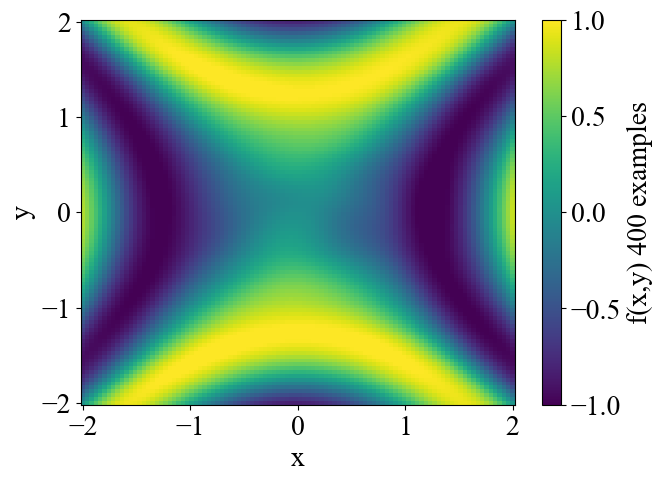

In [23]:
# Check the reproduction of the network with a reduced training set

N_points_net = 100

x_mesh_net = np.linspace(-2,2,N_points_net)
y_mesh_net = np.linspace(-2,2,N_points_net)

net_result = np.zeros((N_points_net,N_points_net))

for i in range(N_points_net):
    
    for j in range(N_points_net):
        
        input_try = np.reshape(np.array([x_mesh_net[i],y_mesh_net[j]]),(1,2))
        net_result[i,j] = np.reshape(net(input_try),(1,))
        
plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
pcm = axs.pcolormesh(x_mesh_net,y_mesh_net,net_result,clim=(-1,1))
axs.set_ylabel('y', fontsize = 20)
axs.set_xlabel('x', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
cbar = fig.colorbar(pcm)
cbar.ax.set_ylabel('f(x,y) 400 examples', fontsize = 20)
cbar.ax.tick_params(labelsize = 20)
fig.savefig('DL_simple_0.4.png', format='png', dpi=600)
plt.show()

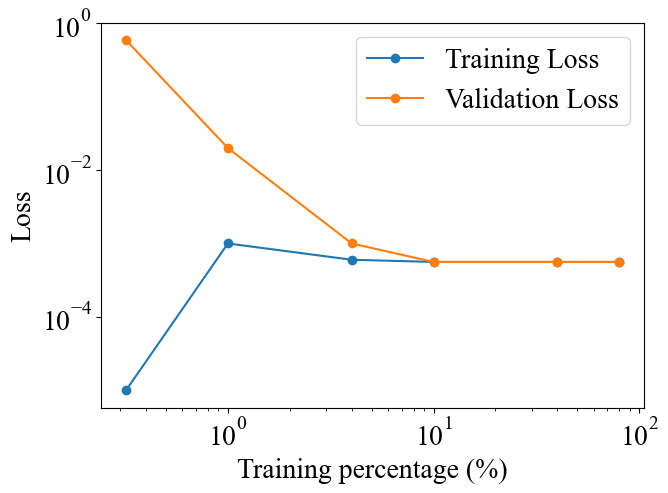

In [17]:
# Make the learning curves of this problem, at constant 25000 network updates

n_training = [80,40,10,4,1,0.32] # Percentage of total data in the training set
train_losss = [5.6*10**(-4),5.6*10**(-4),5.6*10**(-4),6*10**(-4),10**(-3),10**(-5)]
val_losss = [5.6*10**(-4),5.6*10**(-4),5.6*10**(-4),10**(-3),0.02,0.59]

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
axs.plot(n_training,train_losss,marker='o')
axs.plot(n_training,val_losss,marker='o')
axs.set_xlabel('Training percentage (%)', fontsize = 20)
axs.set_ylabel('Loss', fontsize = 20)
axs.set_xscale('log')
axs.set_yscale('log')
axs.tick_params(axis='both', labelsize = 20)
axs.legend(['Training Loss','Validation Loss'], fontsize = 20)
fig.savefig('DL_simple_learning_curve.png', format='png', dpi=600)
plt.show()